# Spotify EDA

As a guitar player and an avid music fan, I thought it would be interesting to explore what the components of top hit songs are. The purpose of this project is to perform exploratory data analysis on Spotify music data, and later try to predict popularity based on specific attributes.

## The Dataset

The dataset comes from Kaggle user Mark Koverha and can be found [here](https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019), and, in the words of the author, it consists of the following columns:

**1. Artist:** Name of the Artist.

**2. Song:** Name of the Track.

**3. Duration_ms:** Duration of the track in milliseconds.

**4. Explicit:** The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.

**5. Year:** Release Year of the track.

**6. Popularity:** The higher the value the more popular the song is.

**7. Danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**8. Energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

**9. Key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

**10. Loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

**11. Mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**12. Speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**13. Acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**14. Instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**15. Liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**16. Valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**17. Tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**18. Genre:** Genre of the track.

## Getting data into a dataframe, understanding how it looks like, and cleaning the data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data into a dataframe
df = pd.read_csv('songs_normalize.csv')
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


Check for missing values

In [3]:
df.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

Remove any duplicate data

In [4]:
df.drop_duplicates(inplace=True)

Identify the years included in the dataset

In [5]:
df.year.unique()

array([2000, 1999, 2001, 2011, 2002, 2016, 1998, 2018, 2004, 2010, 2015,
       2006, 2008, 2019, 2003, 2013, 2005, 2012, 2020, 2007, 2009, 2017,
       2014])

Since the dataset is supposed to only include data from 2000-2019, it might be a good idea to drop the values outside of that range.

In [6]:
df = df[(df.year>=2000) & (df.year<=2019)] #drop 1998,1999,and 2020

Let us see if it worked:

In [7]:
df.year.unique()

array([2000, 2001, 2011, 2002, 2016, 2018, 2004, 2010, 2015, 2006, 2008,
       2019, 2003, 2013, 2005, 2012, 2007, 2009, 2017, 2014])

Next, we learn about how much data we have and obtain some summary statistics

In [8]:
df.shape
#(rows, columns)

(1899, 18)

In [9]:
#summary statistics per variable
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000
mean,228123.525540,2009.720379,59.558715,0.667637,0.721256,5.379147,-5.503538,0.553976,0.104413,0.127722,0.015525,0.181934,0.552579,120.115425
std,39116.687604,5.725938,21.683909,0.140547,0.152511,3.610882,1.931067,0.497209,0.096523,0.172951,0.089036,0.140827,0.220361,26.986107
min,113000.000000,2000.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203273.000000,2005.000000,56.000000,0.581000,0.624500,2.000000,-6.480000,0.000000,0.039900,0.013550,0.000000,0.088750,0.389500,98.605000
50%,222920.000000,2010.000000,65.000000,0.676000,0.738000,6.000000,-5.279000,1.000000,0.061300,0.055300,0.000000,0.125000,0.559000,120.028000
75%,247086.000000,2015.000000,73.000000,0.765000,0.839000,8.000000,-4.167000,1.000000,0.130500,0.175000,0.000064,0.242000,0.730500,134.124500
max,484146.000000,2019.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


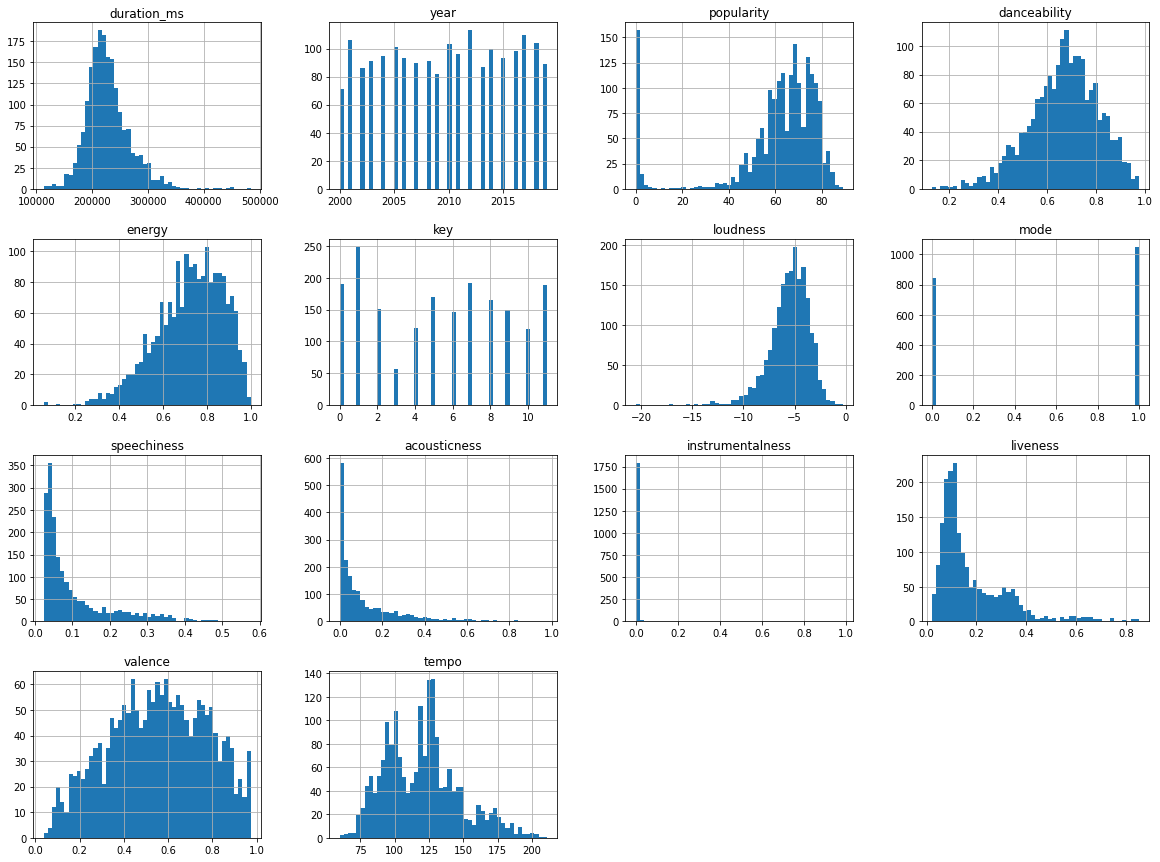

In [10]:
#draw histograms for each variable
df.hist(bins=50, figsize=(20,15))
plt.show()

## Diving into the analysis

### Song Popularity
Which were the most popular songs?

In [11]:
popular_songs = df.sort_values('popularity',ascending=False)
popular_songs.head(10)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,"rock, pop"
1311,Tom Odell,Another Love,244360,True,2013,88,0.445,0.537,4,-8.532,0,0.0400,0.69500,0.000017,0.0944,0.131,122.769,pop
201,Eminem,Without Me,290320,True,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.2370,0.662,112.238,hip hop
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
1819,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"
1613,WILLOW,Wait a Minute!,196520,False,2015,86,0.764,0.705,3,-5.279,0,0.0278,0.03710,0.000019,0.0943,0.672,101.003,"pop, R&B, Dance/Electronic"
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.19200,0.002440,0.0863,0.553,120.042,hip hop
1514,Avicii,The Nights,176658,False,2014,85,0.527,0.835,6,-5.298,1,0.0433,0.01660,0.000000,0.2490,0.654,125.983,"pop, Dance/Electronic"
1709,Ed Sheeran,Perfect,263400,False,2017,85,0.599,0.448,8,-6.312,1,0.0232,0.16300,0.000000,0.1060,0.168,95.050,pop
1227,Bruno Mars,Locked out of Heaven,233478,False,2012,85,0.726,0.698,5,-4.165,1,0.0431,0.04900,0.000000,0.3090,0.867,143.994,pop


#### Top Hits Songs By Year

In [12]:
songs_by_year = df.groupby('year').size().reset_index() #how many top hits per year?
songs_by_year.columns = ['year','songs']
songs_by_year = songs_by_year.sort_values('year',ascending=True)
songs_by_year

,year,songs
0,2000,71
1,2001,106
2,2002,86
3,2003,91
4,2004,95
5,2005,101
6,2006,93
7,2007,90
8,2008,91
9,2009,82


Plot the number of songs by year

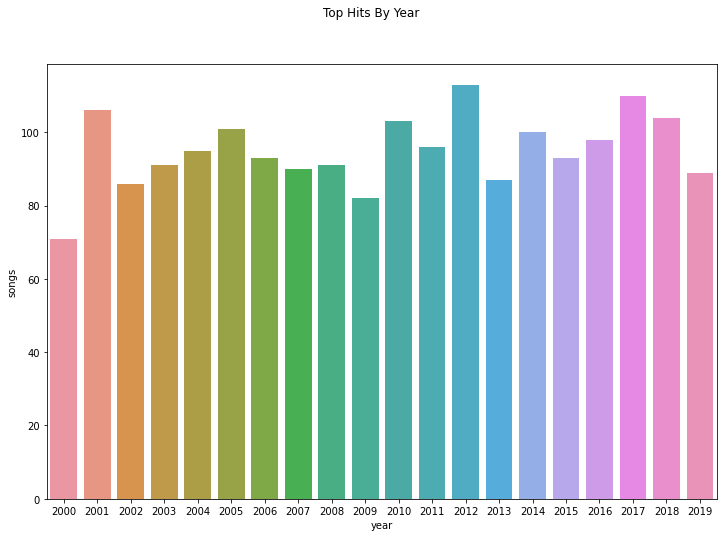

In [13]:
#create a barplot of the number of top hits per year using sns
fig = plt.figure(figsize=(12,8))
sns.barplot(x = 'year', y = 'songs', data = songs_by_year)
plt.suptitle('Top Hits By Year')
plt.show()

#### Song Duration
It could be interesting to see the song duration trends over the years.

Since song duration is in milliseconds, I think it would be a good idea to first convert duration to seconds.

In [14]:
df['duration_s'] = df['duration_ms'] / 1000

In [15]:
df.drop('duration_ms', axis=1, inplace=True)

In [16]:
df.head()

,artist,song,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_s
0,Britney Spears,Oops!...I Did It Again,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,211.160
3,Bon Jovi,It's My Life,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",224.493
4,*NSYNC,Bye Bye Bye,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,200.560
6,Eminem,The Real Slim Shady,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,hip hop,284.200
7,Robbie Williams,Rock DJ,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.0267,0.000000,0.4670,0.861,103.035,"pop, rock",258.560


Let us see the average song duration.

In [17]:
np.round(df['duration_s'].mean(), 2)

228.12

#### Has The Average Song Duration Changed Over Time?

In [18]:
#for each year, identify the average duration of top hits
songduration_by_year = df.groupby('year').duration_s.mean().reset_index()
songduration_by_year

,year,duration_s
0,2000,250.951282
1,2001,242.871519
2,2002,251.941628
3,2003,236.625440
4,2004,233.702726
5,2005,237.347267
6,2006,238.127656
7,2007,232.155400
8,2008,234.391297
9,2009,235.661146


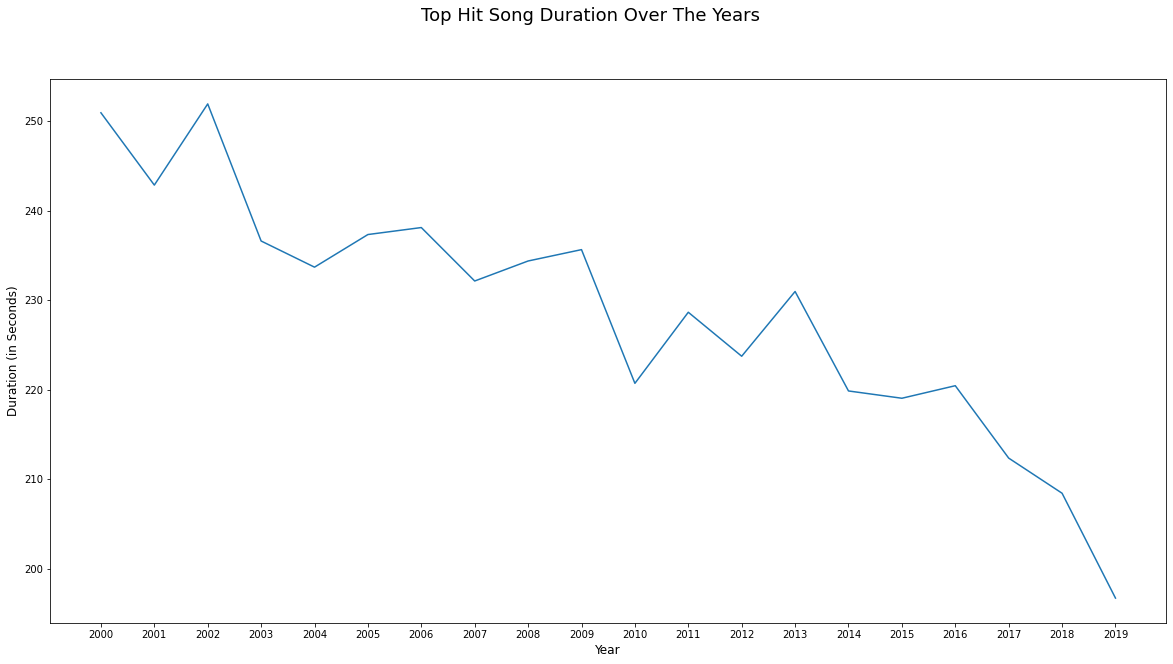

In [19]:
figure1 = plt.figure(figsize=(20,10))
sp = figure1.add_subplot(1, 1, 1)
sp.set_xticks(range(2000,2020))
plt.plot(songduration_by_year['year'],songduration_by_year['duration_s'])
plt.suptitle('Top Hit Song Duration Over The Years', fontsize = 18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Duration (in Seconds)', fontsize=12)
plt.show()

### Who were the most popular artists?

#### Identifying The Artists With Most Top Hits

In [20]:
#see how many times each artist appears
top_artists = df['artist'].value_counts()
#see the top 10 artists
top_artists.head(10)

Rihanna           23
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    18
David Guetta      18
Katy Perry        16
Beyoncé           16
Chris Brown       16
Taylor Swift      16
Name: artist, dtype: int64

We can see our top 10 artists (artists that have the most top hits) is comprised of Rihanna, Drake, Eminem, Calvin Harris, Britney Spears, David Guetta, Chris Brown, Katy Perry, Beyoncé, and Taylor Swift. Now, let us make identifying the top 10 more aesthetically pleasing by using a bar graph.

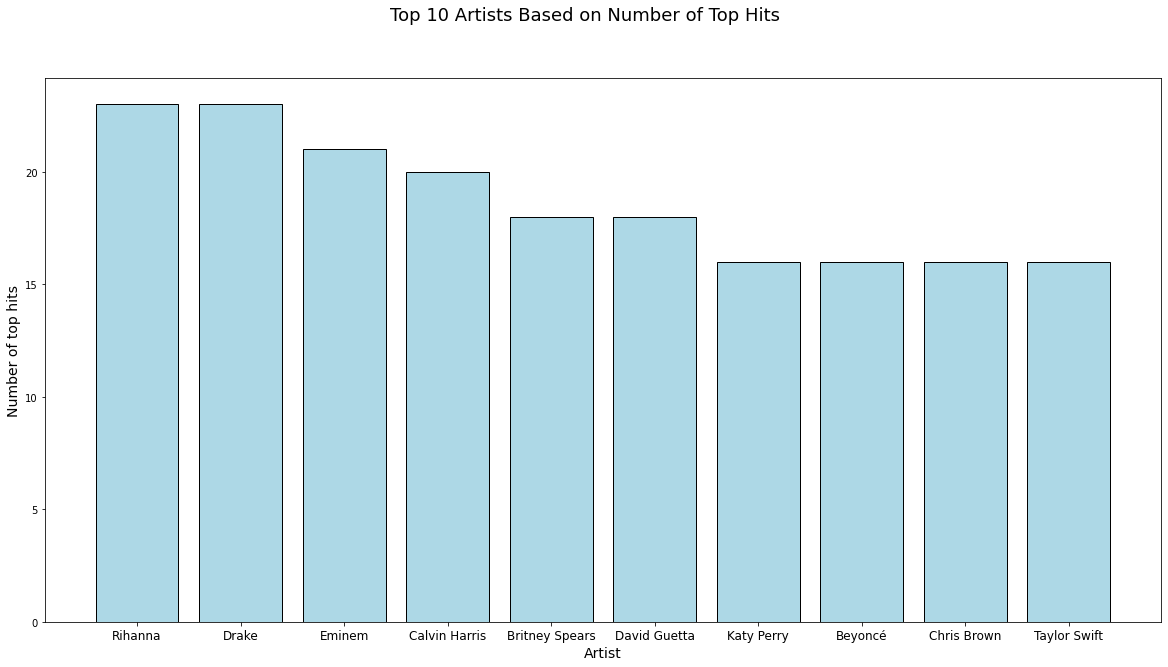

In [21]:
top_10_art = top_artists[:10].index
top_10_songs = top_artists[:10]
fig = plt.figure(figsize=(20,10))
plt.bar(top_10_art,top_10_songs, color='lightblue', edgecolor = 'black')
plt.suptitle('Top 10 Artists Based on Number of Top Hits',fontsize ='18')
plt.xlabel('Artist', fontsize = 14)
plt.ylabel('Number of top hits', fontsize=14)
plt.xticks(fontsize=12)
plt.show()

#### Artists by Popularity

What if we take a look at artists by popularity of songs instead of the number of top hits? In other words, for each artist, what is the average of his/her songs' popularity?

In [22]:
Artist_Pop = df.groupby('artist').popularity.mean()
Artist_Pop = Artist_Pop.sort_values(ascending=False)
Artist_Pop.head(10)

artist
Tom Odell            88.0
The Neighbourhood    87.0
WILLOW               86.0
Lewis Capaldi        84.0
Gesaffelstein        84.0
Tame Impala          83.0
Billie Eilish        82.0
MKTO                 82.0
French Montana       82.0
girl in red          82.0
Name: popularity, dtype: float64

#### Artists by Popularity With a Minimum of Top Hits

One problem that can arise is that many of these artists may only have one top hit. Therefore, what would happen if we use both the number of top hits and popularity through looking at artists by average popularity with a minimum of top hits?

In [23]:
#group artist, popularity and songs into one dataframe
Artist_Pop = df.groupby('artist').popularity.mean().reset_index() #for each artist, what is the avg of song popularity
Songs_by_Artist = df.groupby("artist").size().reset_index() #for each artist, count the number of songs
popularity_songs_by_artist = Artist_Pop.merge(Songs_by_Artist, on='artist') #merge artist, songs, and popularity into one
popularity_songs_by_artist.columns = ['artist','popularity','songs']
popularity_songs_by_artist.head()

,artist,popularity,songs
0,*NSYNC,55.0,4
1,112,60.0,2
2,2 Chainz,70.0,2
3,21 Savage,76.0,2
4,2Pac,62.5,2


What should the minimum of top hit songs be?

In [24]:
popularity_songs_by_artist.songs.mean()#average number of songs by artist

2.318681318681319

Therefore, I think it is reasonable for us to use 5 top hits as the minimum, and in that way determine exceptional, top artists - artists with several top hits and with high song popularity.

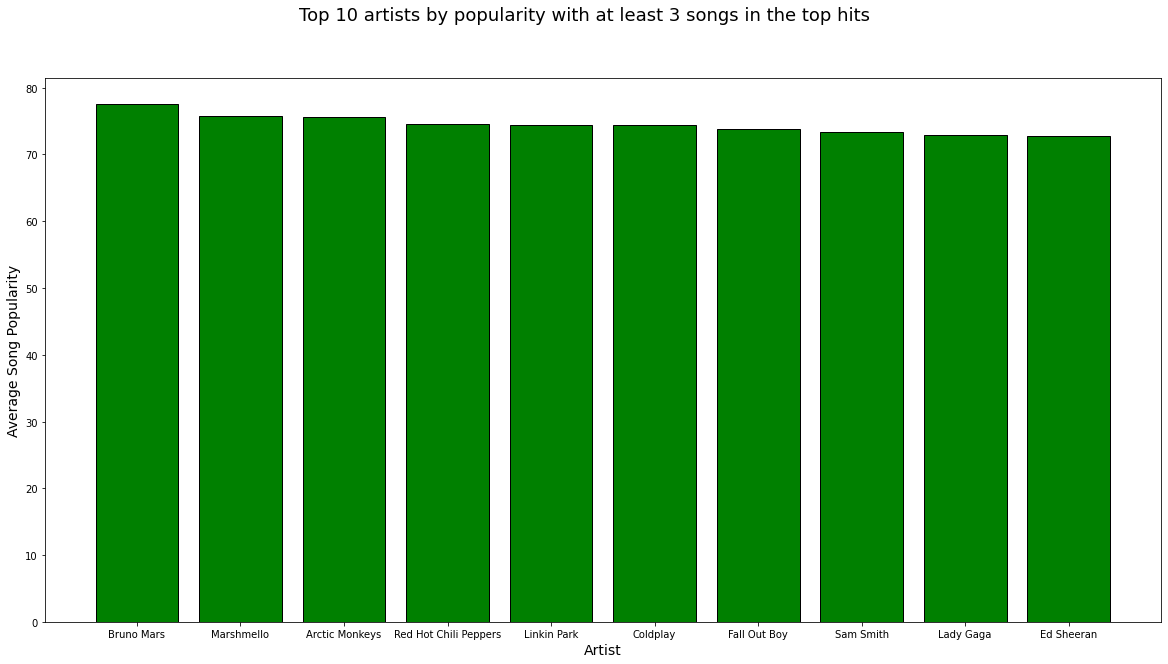

In [25]:
artists_greater_5 = popularity_songs_by_artist[popularity_songs_by_artist.songs >= 5]
artists_greater_5 = artists_greater_5.sort_values('popularity', ascending=False)
artists_greater_5 = artists_greater_5[:10]
fig = plt.figure(figsize=(20,10))
plt.bar(artists_greater_5['artist'],artists_greater_5['popularity'], color='green', edgecolor = 'black')
plt.suptitle('Top 10 artists by popularity with at least 3 songs in the top hits',fontsize ='18')
plt.xlabel('Artist', fontsize = 14)
plt.ylabel('Average Song Popularity', fontsize=14)
plt.xticks(fontsize=10)
plt.show()

In [26]:
artists_greater_5

,artist,popularity,songs
119,Bruno Mars,77.545455,11
497,Marshmello,75.833333,6
52,Arctic Monkeys,75.600000,5
613,Red Hot Chili Peppers,74.600000,5
452,Linkin Park,74.375000,8
164,Coldplay,74.363636,11
253,Fall Out Boy,73.800000,5
643,Sam Smith,73.428571,7
423,Lady Gaga,72.900000,10
227,Ed Sheeran,72.777778,9


We can see that it is a completely different set of artists, and perhaps combining them with the top 10 artists with most top hits is the best way to describe the top 20 artists from the dataset. 

### Musical Genre

#### Let's see which genres are the most recurrent in the dataset.

In [27]:
#top genres
genre_values = df.groupby('genre').size().sort_values(ascending=False).reset_index()
genre_values.columns = ['genre','count']
genre_values = genre_values.head(10)
genre_values

,genre,count
0,pop,404
1,"hip hop, pop",265
2,"hip hop, pop, R&B",232
3,"pop, Dance/Electronic",214
4,"pop, R&B",167
5,hip hop,118
6,"hip hop, pop, Dance/Electronic",75
7,rock,56
8,Dance/Electronic,40
9,"rock, pop",37


In [28]:
np.round(df.groupby('genre').size().mean(),3)

32.741

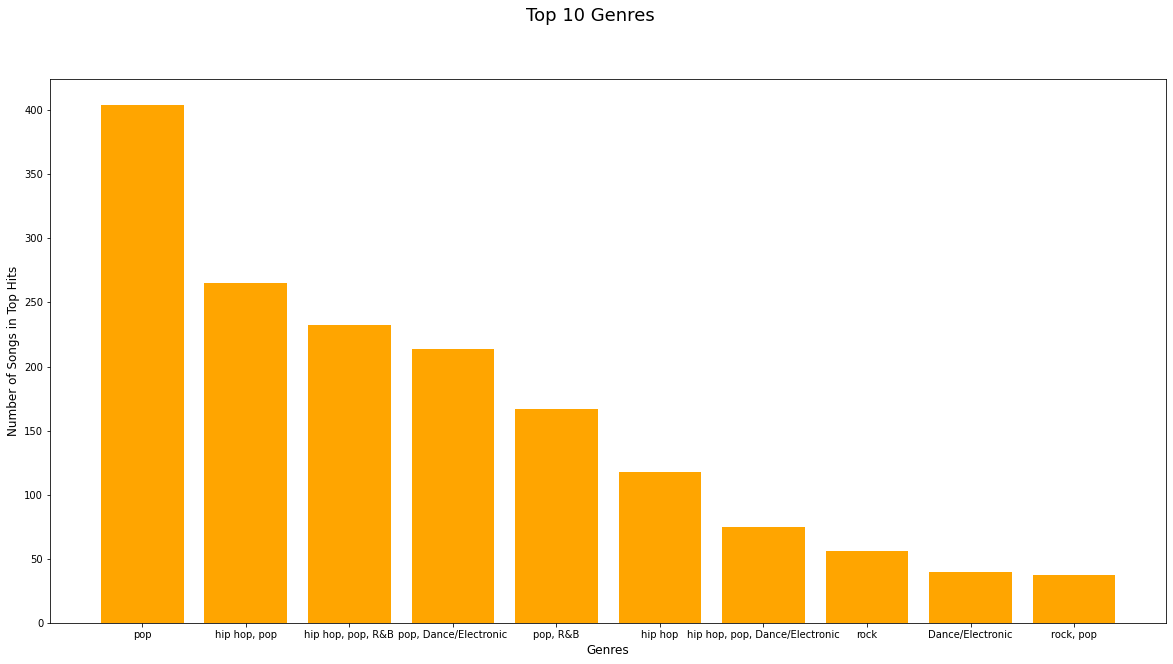

In [29]:
fig6 = plt.figure(figsize=(20,10))
plt.bar(genre_values['genre'], genre_values['count'], color='orange')
plt.suptitle("Top 10 Genres", fontsize=18)
plt.xlabel('Genres',fontsize=12)
plt.ylabel('Number of Songs in Top Hits',fontsize=12)
plt.show()

It seems like the most popular genres are pop, hip hop, R&B, Dance/Electronic, and Rock.

#### Song Duration Based on Genre

We can see that the average top hit song duration has been decreasing from 2000-2019. However, what happens if we take a look at duration by genre?

In [30]:
duration_by_genre = df.groupby('genre').duration_s.mean().reset_index()
duration_by_genre = duration_by_genre.sort_values('duration_s', ascending=False)
duration_by_genre.head()

,genre,duration_s
13,easy listening,302.146
2,"Folk/Acoustic, rock",278.666
18,"hip hop, latin, Dance/Electronic",256.971
24,"hip hop, pop, country",252.653
35,"pop, R&B, easy listening",250.106


It seems like we have some erronous genre data (there is a genre called set()). Let us drop those values:

In [31]:
no_set = duration_by_genre.drop(57, axis=0)
no_set.head()

,genre,duration_s
13,easy listening,302.146
2,"Folk/Acoustic, rock",278.666
18,"hip hop, latin, Dance/Electronic",256.971
24,"hip hop, pop, country",252.653
35,"pop, R&B, easy listening",250.106


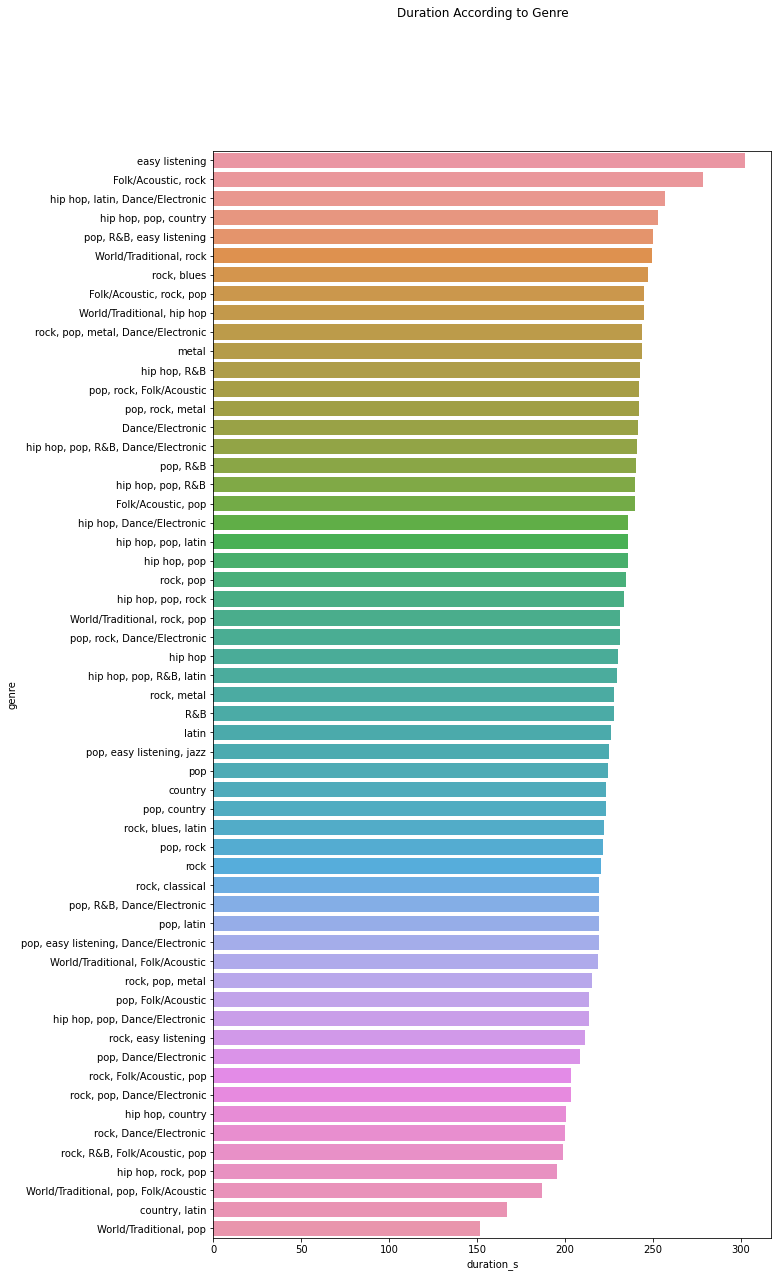

In [32]:
fig2 = plt.figure(figsize=(10,20))
sns.barplot(x = 'duration_s', y = 'genre', data = no_set)
plt.suptitle('Duration According to Genre')
plt.show()

There is not much of a difference across genres. Moreover, many genres only have 1 song in this dataset. 

#### Popularity by Genre

In [33]:
popu_by_genre = df.groupby('genre').popularity.median().reset_index()
popu_by_genre.sort_values('popularity', ascending=False).head(10)

,genre,popularity
42,"pop, rock, Folk/Acoustic",79.0
1,"Folk/Acoustic, pop",78.0
56,"rock, pop, metal, Dance/Electronic",76.0
25,"hip hop, pop, latin",75.5
27,"hip hop, rock, pop",75.0
44,rock,73.5
29,metal,72.0
13,easy listening,72.0
28,latin,72.0
18,"hip hop, latin, Dance/Electronic",72.0


## EDA Conclusion

- **Top Artists by number of top hits:** Rihanna, Drake, Eminem, Calvin Harris, Britney Spears, David Guetta, Chris Brown, Katy Perry, Beyoncé, and Taylor Swift.


- **Top Artists with a minimum of 5 Top Hits and Average Song Popularity:** Bruno Mars, Marshmello, Arctic Monkeys, Red Hot Chili Peppers, Linkin Park, Coldplay, Fall Out Boy, Sam Smith, Lady Gaga, Ed Sheeran.  


- Song duration has been steadily decreasing from the year 2000 to 2019  


- **The most frequent genres in top hits:** Pop, Hip Hop, R&B, Dance/Electronic, and Rock  


- **The 10 most popular songs in the dataset in order were:** Sweater Weather by The Neighbourhood, Another Love by Tom Odell, Without Me by Eminem, The Real Slim Shady by Eminem, Lovely by Billie Eilish with Khalid, Wait a Minute! by WILLOW, Circles by Post Malone, The Nights by Avicii, Perfect by Ed Sheeran, Locked Out of Heaven by Bruno Mars  

# Linear Regression

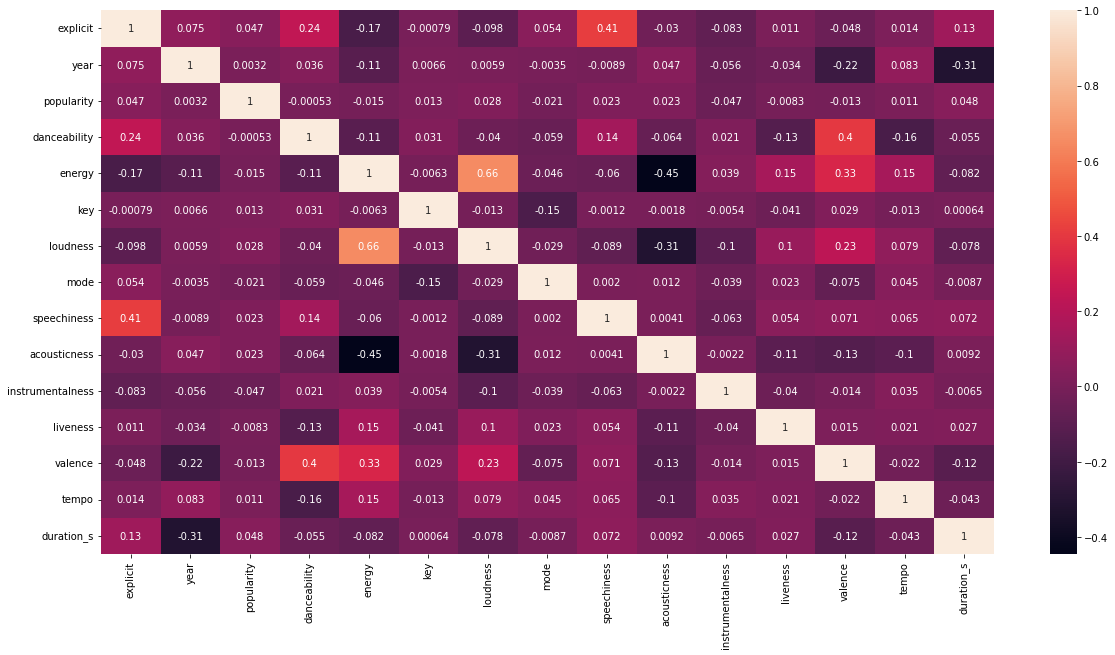

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

I wanted to see if we could predict popularity; it seems like there are no strong correlations for any of the variables with regards to popularity.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
df2 = df.drop(['artist','song','genre'],axis=1)
X = df2.drop('popularity', axis = 1)
y = df2['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [82]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print('MAE train: %.3f' % mean_absolute_error(y_train, y_train_pred))
print('MAE test: %.3f' % mean_absolute_error(y_test, y_test_pred))

MAE train: 15.258
MAE test: 14.257


In [38]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print('MSE train: %.3f' % mean_squared_error(y_train_pred, y_train))
print('MSE test: %.3f' % mean_squared_error(y_test_pred, y_test))

MSE train: 480.766
MSE test: 413.288


With a pipeline and Standard Scaler:

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [8]:
df2 = df.drop(['artist','song','genre'],axis=1)
X = df2.drop('popularity', axis = 1)
y = df2['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('linreg', LinearRegression())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('linreg', LinearRegression())])

In [10]:
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print('MAE train: %.3f' % mean_absolute_error(y_train, y_train_pred))
print('MAE test: %.3f' % mean_absolute_error(y_test, y_test_pred))

MAE train: 14.433
MAE test: 14.947


In [11]:
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print('MSE train: %.3f' % mean_squared_error(y_train_pred, y_train))
print('MSE test: %.3f' % mean_squared_error(y_test_pred, y_test))

MSE train: 445.586
MSE test: 470.885
